In [94]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
df=pd.read_csv('weatheraus.csv')

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Comments
--
- Given data has 8423 rows and 23 columns
- 7 columns are categorical and 16 columns are neumerical

In [96]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Comments
--
- given dataset has high number of null values so we will treat the data accordingly and removenull values

In [97]:
allcolumns=df.columns
allcolumns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [98]:
num_columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
cat_columns=[ 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [99]:
for i in df[num_columns]:
    df[i].fillna(df[num_columns][i].median(), inplace=True)
for i in df[cat_columns]:
    df[i].fillna(df[cat_columns][i].mode()[0], inplace=True)   

In [100]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Plotting data distribution
--

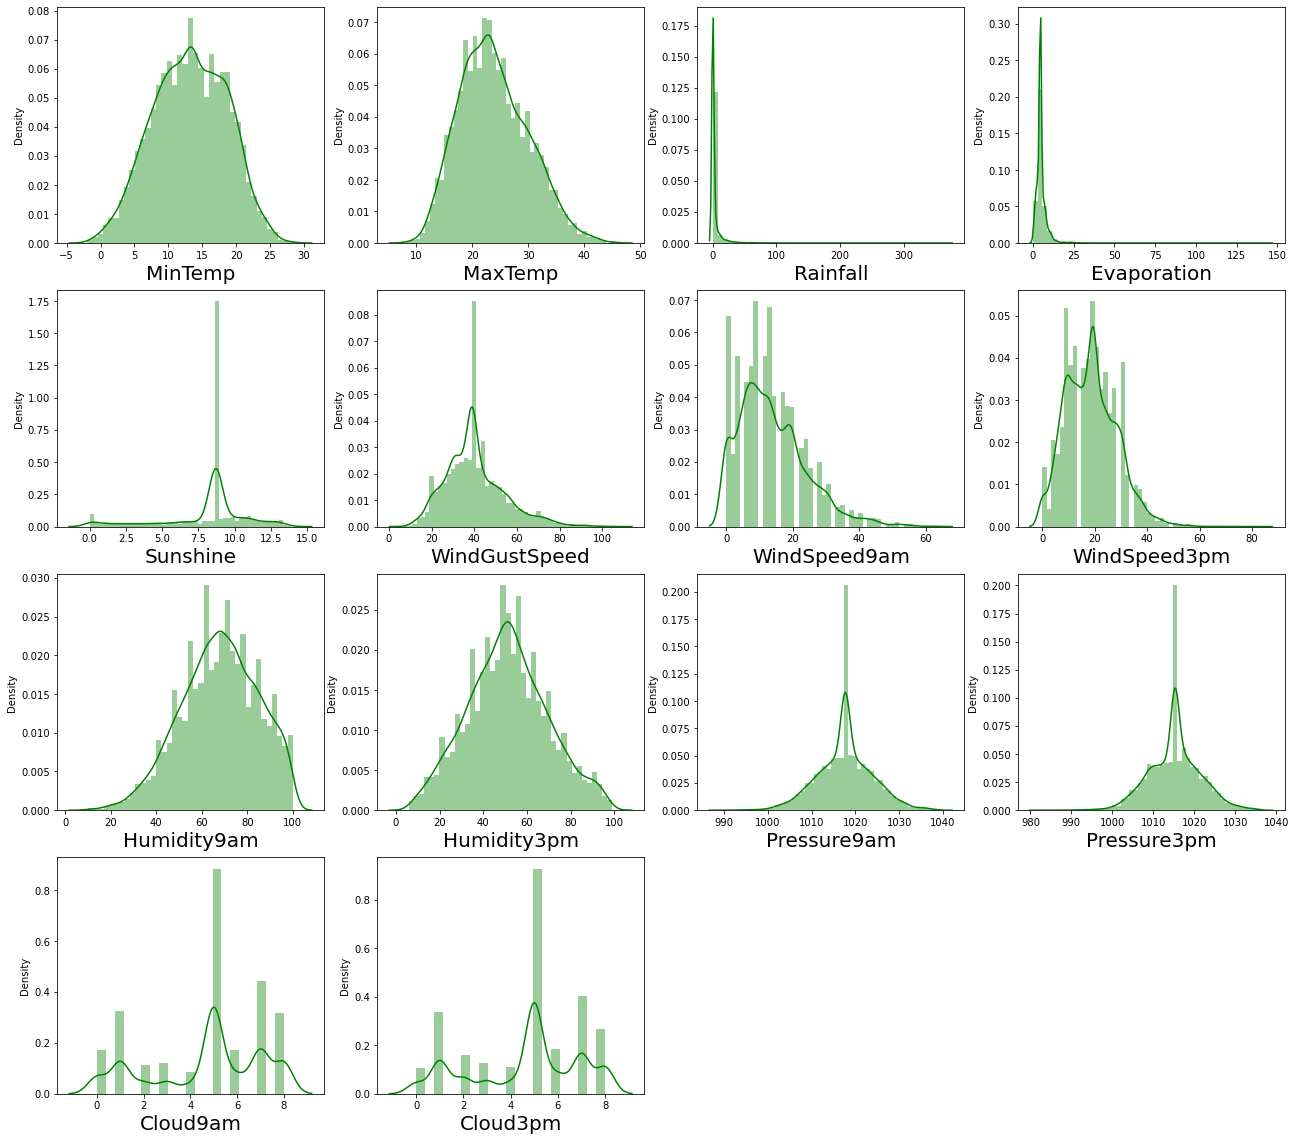

In [101]:
plt.figure(figsize=(22,20),facecolor='white')
plotnum=1
for col in num_columns:
    if plotnum<=14:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


In [102]:
df.skew()

MinTemp          -0.090519
MaxTemp           0.382572
Rainfall         13.200523
Evaporation      14.064000
Sunshine         -1.189333
WindGustSpeed     0.786153
WindSpeed9am      0.962761
WindSpeed3pm      0.492365
Humidity9am      -0.256965
Humidity3pm       0.118776
Pressure9am      -0.028521
Pressure3pm      -0.015018
Cloud9am         -0.514801
Cloud3pm         -0.457713
Temp9am          -0.014883
Temp3pm           0.400388
dtype: float64

In [103]:
any(df['Rainfall']<=0)

True

In [104]:
df['RainFall']=np.sqrt(df['Rainfall'])
df['Evaporation']=np.sqrt(df['Evaporation'])
df['Evaporation'].skew()
df['RainFall'].skew()


2.9795976464818947

In [105]:
df.skew()

MinTemp          -0.090519
MaxTemp           0.382572
Rainfall         13.200523
Evaporation       2.032500
Sunshine         -1.189333
WindGustSpeed     0.786153
WindSpeed9am      0.962761
WindSpeed3pm      0.492365
Humidity9am      -0.256965
Humidity3pm       0.118776
Pressure9am      -0.028521
Pressure3pm      -0.015018
Cloud9am         -0.514801
Cloud3pm         -0.457713
Temp9am          -0.014883
Temp3pm           0.400388
RainFall          2.979598
dtype: float64

Comments
--
- since rainfall has some non positive data so skewness can not be removed

In [106]:
df['Location'].nunique()

12

Comments
--
- dropping location and date form the dataset to 



In [107]:
df.drop(['Date','Location'],inplace=True,axis=1)


In [108]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()


df['WindGustDir']= label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_encoder.fit_transform(df['WindDir3pm'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])



In [109]:
df['WindDir9am'].unique()

array([13,  6,  9,  1, 12, 10,  8,  4,  3, 11, 15,  2,  0,  7, 14,  5],
      dtype=int64)

collinearity heatmap
--


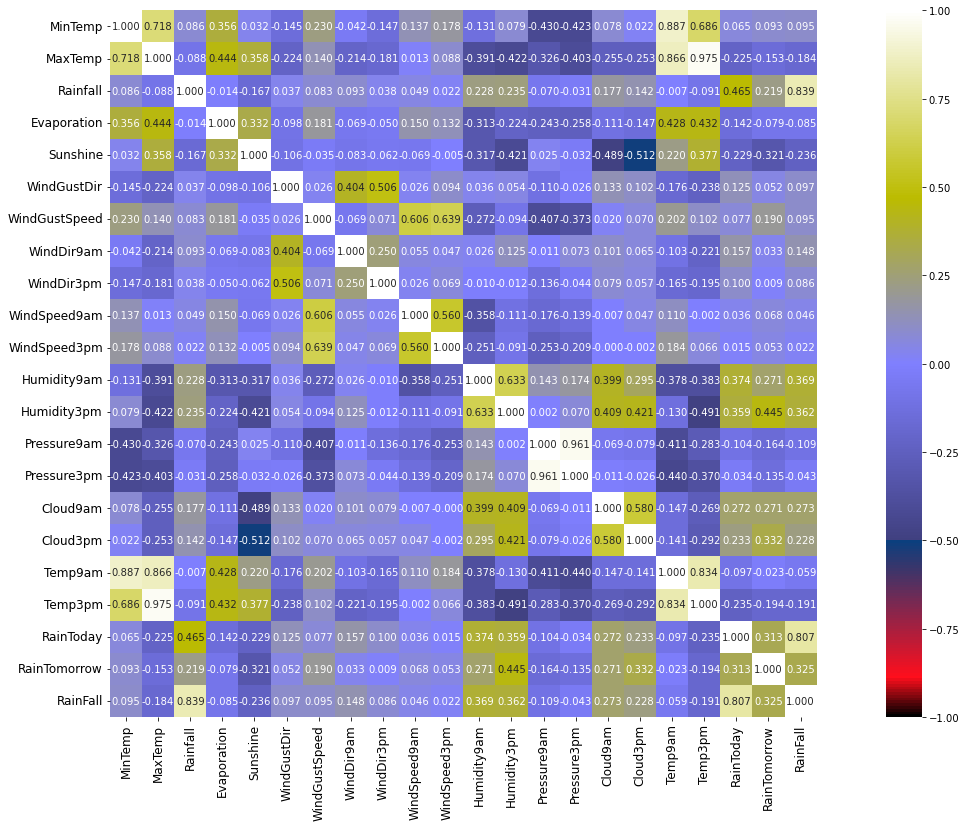

In [110]:
plt.figure(figsize=(25,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Comments
--
- max temp is highly dependent on temp3pm
- min temp is highly dependent on temp 9am 
- so we are going to drop min and max temp 

In [111]:
df.drop(['MinTemp','MaxTemp'],inplace=True,axis=1)
num_columns.remove('MinTemp')
num_columns.remove('MaxTemp')


Standard Scaling
--

In [112]:
X=df.drop(columns =['RainTomorrow'])
Y=df['RainTomorrow']

In [113]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

Machine Learning Model Building- part 1 rain forecasting
--

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5897, 19)
Training target vector size: (5897,)
Test feature matrix size: (2528, 19)
Test target vector size: (2528,)


Finding best Random state
--

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.853243670886076 on Random_state 173


Logistics Regression Model
--


In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=173, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.853243670886076


Confusion matrix of Logistics Regression : 
 [[1844  116]
 [ 255  313]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1960
           1       0.73      0.55      0.63       568

    accuracy                           0.85      2528
   macro avg       0.80      0.75      0.77      2528
weighted avg       0.85      0.85      0.85      2528



Finding Optimal value of n_neighbors for KNN
--

In [117]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.40173673601413545
RMSE value for k=  2 is: 0.42331198657099656
RMSE value for k=  3 is: 0.4361983348681791
RMSE value for k=  4 is: 0.41814085204856355
RMSE value for k=  5 is: 0.4143394926746344
RMSE value for k=  6 is: 0.42049925119215675
RMSE value for k=  7 is: 0.42190796284725895
RMSE value for k=  8 is: 0.4190858043317681
RMSE value for k=  9 is: 0.4171937594348607
RMSE value for k=  10 is: 0.4190858043317681
RMSE value for k=  11 is: 0.41146542682023046
RMSE value for k=  12 is: 0.41671940594498263
RMSE value for k=  13 is: 0.41481656766591013
RMSE value for k=  14 is: 0.4124256741630675
RMSE value for k=  15 is: 0.4071162866873247
RMSE value for k=  16 is: 0.4076018161224617
RMSE value for k=  17 is: 0.40663017751492914
RMSE value for k=  18 is: 0.40905494663564285
RMSE value for k=  19 is: 0.40663017751492914
RMSE value for k=  20 is: 0.40614348652362947
RMSE value for k=  21 is: 0.40808676788960246
RMSE value for k=  22 is: 0.410984461808596
RMSE va

comment
--
- At k=20 RMSE valaue is minimum **(0.40614348652362947)** so it will give us the best result.

Applying other classification algorithm
--

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8560126582278481


Confusion matrix : 
 [[1879   81]
 [ 283  285]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1960
           1       0.78      0.50      0.61       568

    accuracy                           0.86      2528
   macro avg       0.82      0.73      0.76      2528
weighted avg       0.85      0.86      0.84      2528





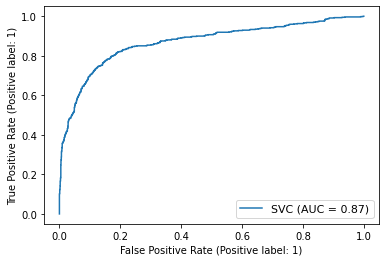

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8215981012658228


Confusion matrix : 
 [[1732  228]
 [ 223  345]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1960
           1       0.60      0.61      0.60       568

    accuracy                           0.82      2528
   macro avg       0.74      0.75      0.74      2528
weighted avg       0.82      0.82      0.82      2528





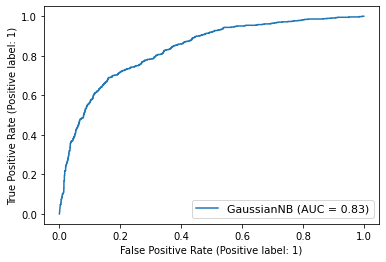

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.8465189873417721


Confusion matrix : 
 [[1756  204]
 [ 184  384]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1960
           1       0.65      0.68      0.66       568

    accuracy                           0.85      2528
   macro avg       0.78      0.79      0.78      2528
weighted avg       0.85      0.85      0.85      2528





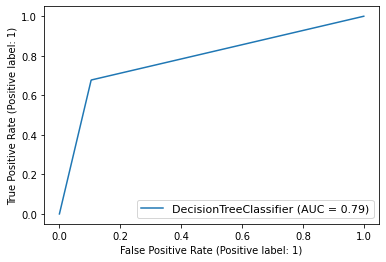

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.8097310126582279


Confusion matrix : 
 [[1783  177]
 [ 304  264]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1960
           1       0.60      0.46      0.52       568

    accuracy                           0.81      2528
   macro avg       0.73      0.69      0.70      2528
weighted avg       0.80      0.81      0.80      2528





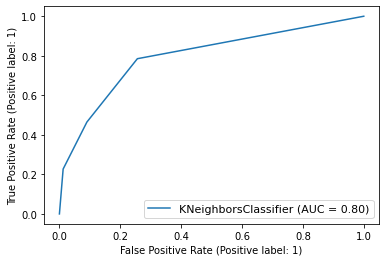

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.903876582278481


Confusion matrix : 
 [[1902   58]
 [ 185  383]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1960
           1       0.87      0.67      0.76       568

    accuracy                           0.90      2528
   macro avg       0.89      0.82      0.85      2528
weighted avg       0.90      0.90      0.90      2528





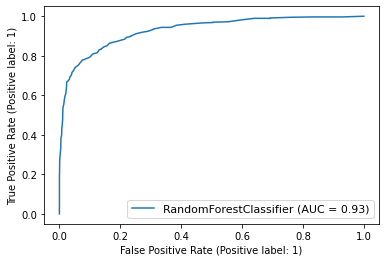

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8983386075949367


Confusion matrix : 
 [[1898   62]
 [ 195  373]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1960
           1       0.86      0.66      0.74       568

    accuracy                           0.90      2528
   macro avg       0.88      0.81      0.84      2528
weighted avg       0.90      0.90      0.89      2528





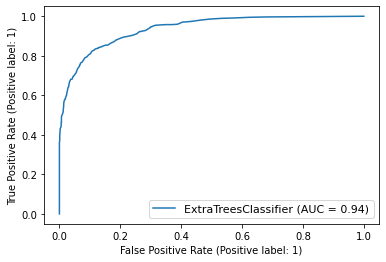

In [25]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')

CrossValidation :
--

In [26]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.85816024 0.79228487 0.78813056 0.81721068 0.85578635]
Mean Score : 0.8223145400593472
Std deviation : 0.030005502757661538




Cross Validation Score SVC() :

Score : [0.83857567 0.80534125 0.82492582 0.83204748 0.84569733]
Mean Score : 0.8293175074183976
Std deviation : 0.013824708946806838




Cross Validation Score GaussianNB() :

Score : [0.82077151 0.77626113 0.7537092  0.76023739 0.85222552]
Mean Score : 0.7926409495548962
Std deviation : 0.03788303078582755




Cross Validation Score DecisionTreeClassifier() :

Score : [0.74243323 0.84094955 0.85875371 0.8148368  0.78872404]
Mean Score : 0.8091394658753709
Std deviation : 0.040920473051713854




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.78931751 0.78278932 0.80652819 0.78931751 0.79762611]
Mean Score : 0.7931157270029674
Std deviation : 0.008194210371082795




Cross Validation Score RandomForestClassifier() :

Score : [0.84332344 0.85163

comments
--
- Here RandomForestClassifier() gives us good Accuracy and maximum f1 score and best Cross-validation score. now applying Hyperparameter tuning on Random Forest model and Used it as final model.`

Hyper Parameter Tuning : GridSearchCV
--


In [118]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.807 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.830 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.831 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.813 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [28]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 60}

In [119]:
#Final Model
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8983386075949367


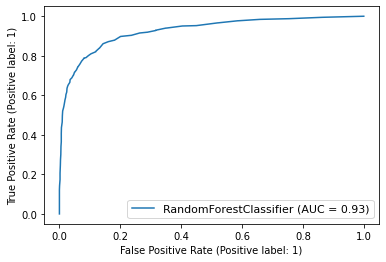

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8156546421385455


In [120]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [121]:
import joblib
joblib.dump(Final_mod,'rainTomorrow_1.pkl')

['rainTomorrow_1.pkl']

Machine Learning Model Building- part 2 how much rainfall 
--


In [65]:
#Standard Scaling

X=df.drop(columns =['Rainfall'])
Y=df['Rainfall']

scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

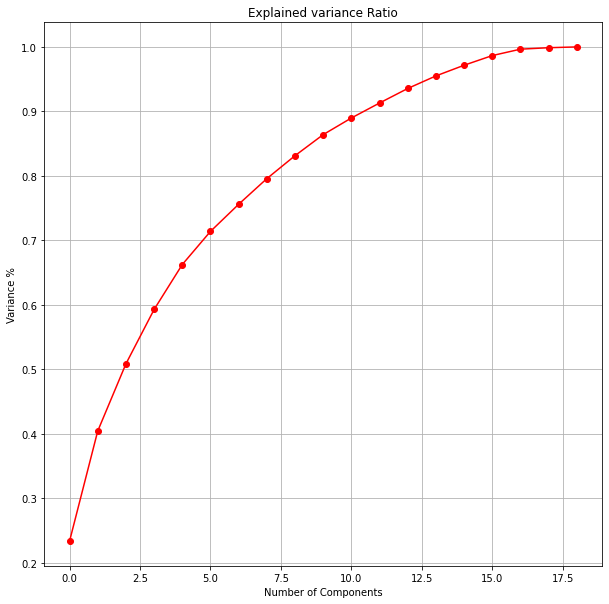

In [74]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()


In [75]:
pca_new = PCA(n_components=11)
x_new = pca_new.fit_transform(X_scale)
principle_x=pd.DataFrame(x_new,columns=np.arange(11))

Checking Multicollinearity after applying PCA
--


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


- no multicollinearity

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5897, 11)
Training target vector size: (5897,)
Test feature matrix size: (2528, 11)
Test target vector size: (2528,)


Finding Best Random state
--


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5974542710393573 on Random_state 201


Finding best n_neighbors for KNN Regressor
--


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=201, test_size=.25)
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3.369749426998894
RMSE value for k=  2 is: 3.4810888173863805
RMSE value for k=  3 is: 3.757855594482973
RMSE value for k=  4 is: 3.7400465912851124
RMSE value for k=  5 is: 3.7636736186518776
RMSE value for k=  6 is: 3.5908530826096174
RMSE value for k=  7 is: 3.636241395226964
RMSE value for k=  8 is: 3.697519319224954
RMSE value for k=  9 is: 3.748753961433942
RMSE value for k=  10 is: 3.7178636932230122


Comment
--
- At k=1 RMSE value is 3.3697 which is minimum so k=1 will give us the best result


Applying other Regression Model, Evaluation & Crossvalidation
--


In [82]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=1,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)

model = [rf,ls,rd,svr,dtc,adb,gradb,knn]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, X_scale, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')




 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 0.027790364829791307
Mean squared error : 0.06977068799025173
Root Mean Squared Error: 0.26414141665072466


 R2 Score :
0.9990589582714986


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.9623767366936791


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 1.7427288093129227
Mean squared error : 8.04875360060871
Root Mean Squared Error: 2.837032534288021


 R2 Score :
0.891441331327315


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :

Mean CV Score : 0.7869918574933508


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 1.8516941418928492
Mean squared error : 7.996535121504069
Root Mean Squared Error: 2.827814548640711


 R2 Score :
0.8921456352298824


Cross Validation Score : Ridge(alpha=0.01, normalize=True) :

Mean CV Score : 0.8338432237678729


 Error



 True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


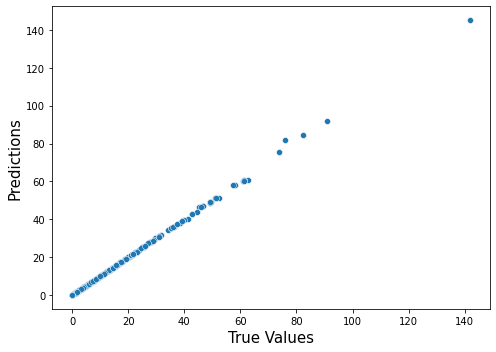





 True Values Vs Predicted Value plot Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :


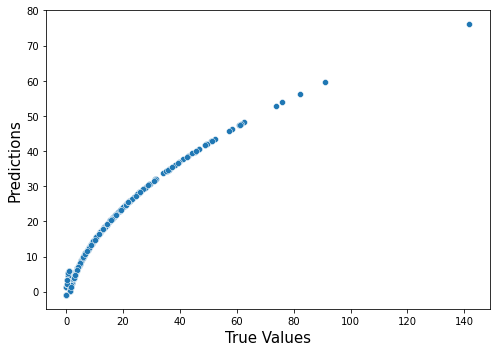





 True Values Vs Predicted Value plot Ridge(alpha=0.01, normalize=True) :


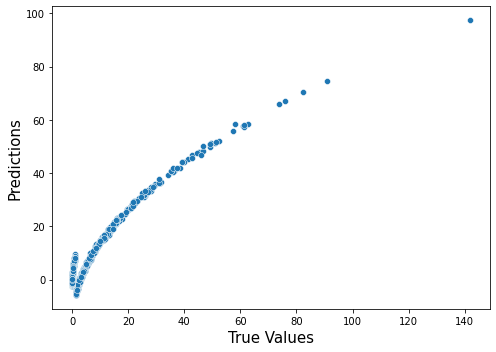





 True Values Vs Predicted Value plot SVR(epsilon=0.2, gamma='auto', kernel='poly') :


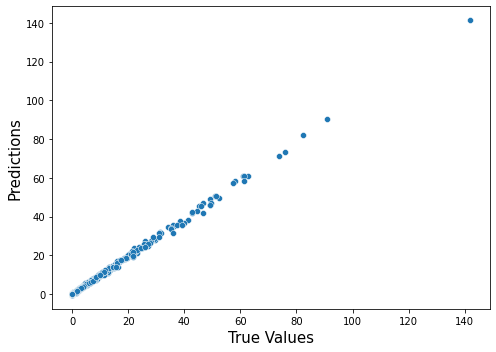





 True Values Vs Predicted Value plot DecisionTreeRegressor(criterion='mse') :


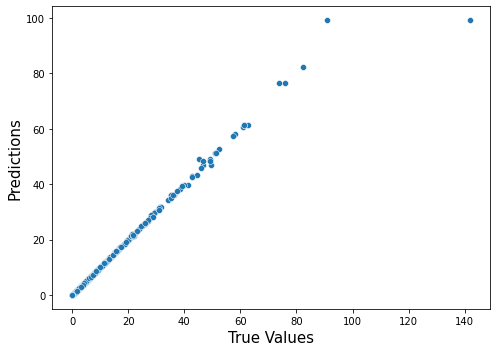





 True Values Vs Predicted Value plot AdaBoostRegressor(learning_rate=0.1) :


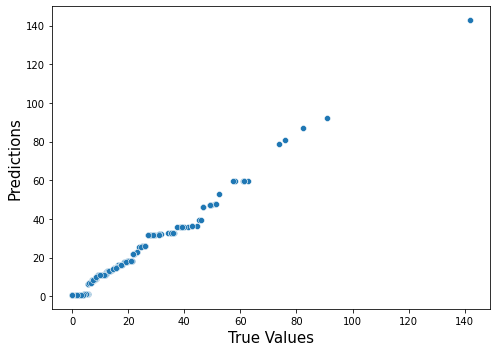





 True Values Vs Predicted Value plot GradientBoostingRegressor(max_depth=6) :


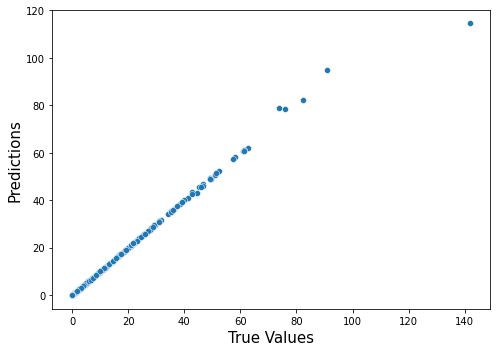





 True Values Vs Predicted Value plot KNeighborsRegressor(algorithm='kd_tree', n_neighbors=1) :


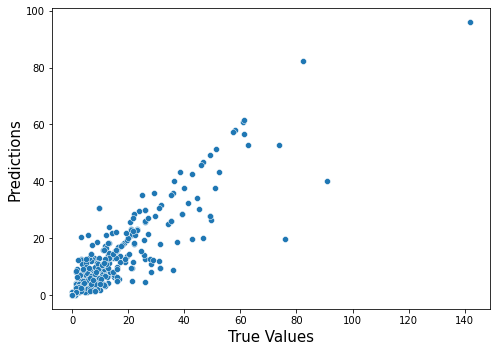

In [88]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

- we can see that lasso model R2 score is  realistic  which is .891 so we will

Hyper Parameter Tuning : GridSearchCV
--

In [89]:
from sklearn.model_selection import GridSearchCV
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],'normalize':[True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}
GCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 19200 candidates, totalling 96000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [90]:
GCV.best_params_

{'alpha': 0.01,
 'fit_intercept': True,
 'max_iter': 250,
 'normalize': False,
 'random_state': 20,
 'selection': 'random'}

final model
--


In [91]:
Final_mod = Lasso(alpha = 0.01, fit_intercept= True, normalize = False,
                                           max_iter = 250, random_state = 20,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')




 Error in Final Model :
Mean absolute error : 1.930356432232925
Mean squared error : 8.676303856805884
Root Mean Squared Error: 2.945556629366661


 R2 Score of Final Model :
0.8829771611317191




Saving model
--


In [93]:
import joblib
joblib.dump(Final_mod,'rainTomorrow_2.pkl')

['rainTomorrow_2.pkl']